In [230]:
import pandas as pd
from pandas import Series,DataFrame


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [231]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("train.csv", dtype={"Age": np.float64}, )


In [232]:
test_df    = pd.read_csv("test.csv", dtype={"Age": np.float64}, )

In [233]:
gender_model    = pd.read_csv("gendermodel.csv" )
gender_class_model    = pd.read_csv("genderclassmodel.csv" )

In [234]:
gender_model.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [235]:
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df    = test_df.drop(['Name','Ticket'], axis=1)

In [236]:
titanic_df.groupby("Embarked").count()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
Embarked,,,,,,,,
C,168,168,168,130,168,168,168,69
Q,77,77,77,28,77,77,77,4
S,644,644,644,554,644,644,644,129


In [237]:
titanic_df[pd.isnull(titanic_df["Cabin"]) == True]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,3,female,26.0,0,0,7.9250,NaN,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C
12,0,3,male,20.0,0,0,8.0500,NaN,S
13,0,3,male,39.0,1,5,31.2750,NaN,S
14,0,3,female,14.0,0,0,7.8542,NaN,S


In [238]:
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

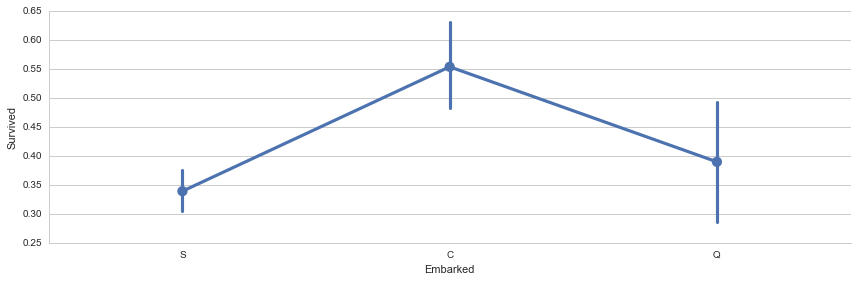

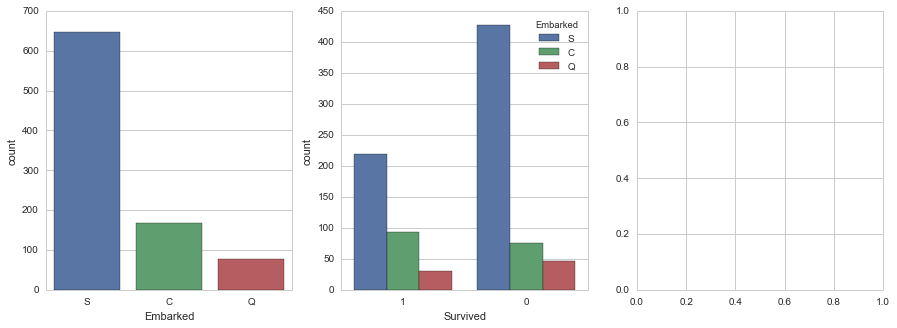

In [239]:
sns.factorplot('Embarked','Survived', data=titanic_df,size=4,aspect=3)
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Embarked', data=titanic_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_df, order=[1,0], ax=axis2)

In [240]:
embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

In [241]:
import pandas as pd

In [242]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [243]:
df = pd.read_csv('train.csv')

In [244]:
df[df.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [245]:
count = df.Age.count()
count
summation = df.Age.sum()
avg = summation/count

In [246]:
avg

29.69911764705882

In [247]:
df.Age = df.Age.fillna(value = avg)

In [248]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [249]:
(df.Survived[df.Survived == 1].count()/df.Survived.count())*100

38.383838383838381

In [250]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [251]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [252]:
femaleSurvival = df.Survived[df.Survived == 1][df.Sex == 'female'].count()
maleSurvival = df.Survived[df.Survived == 1][df.Sex == 'male'].count()

In [253]:
fAvg = femaleSurvival/df.Sex[df.Sex == 'female'].count() * 100
mAvg = maleSurvival/df.Sex[df.Sex == 'male'].count() * 100

In [254]:
fAvg

74.203821656050948

In [255]:
mAvg

18.890814558058924

In [256]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


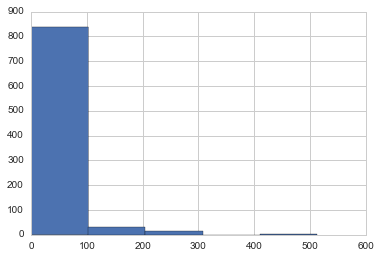

In [257]:
df.Fare.hist(bins = 5)

In [258]:
df[df.Fare == 0.0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.699118,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,29.699118,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.699118,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,0.0,NaN,S


In [259]:
y = df.pop("Survived")
numeric_variables = list(df.dtypes[df.dtypes != "object"].index)
df[numeric_variables].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [260]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

In [261]:
model.fit(df[numeric_variables],y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [262]:
model.oob_score_

0.1361695005913669

In [263]:
from sklearn.metrics import roc_auc_score
y_oob = model.oob_prediction_
print ("c:stat: ", roc_auc_score(y, y_oob))

c:stat:  0.73995515504


In [34]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [264]:
survived = titanic_df[titanic_df["Survived"] == 0]

In [265]:
survived.describe()

/Users/abhisheknigam/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.0,549.000000,424.000000,549.000000,549.000000,549.000000
mean,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,0.0,0.735805,14.172110,1.288399,0.823166,31.388207
min,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.0,2.000000,NaN,0.000000,0.000000,7.854200
50%,0.0,3.000000,NaN,0.000000,0.000000,10.500000
75%,0.0,3.000000,NaN,1.000000,0.000000,26.000000
max,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


In [266]:
survivedMale = survived[survived["Sex"] == "male"]
survivedMale["Male"] = 1
survivedFemale = survived[survived["Sex"] == "female"]
survivedFemale["Female"] = 1
survivedMale = survivedMale.append(survivedFemale, ignore_index=True)
grouped_class = survivedMale[["Female","Male","Pclass"]].groupby(["Pclass"]);

/Users/abhisheknigam/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/abhisheknigam/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


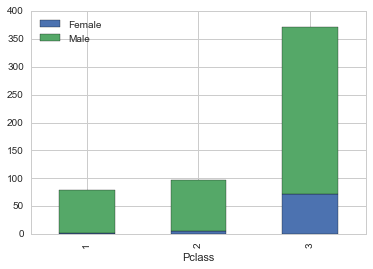

In [267]:
grouped_class[["Female","Male"]].count().plot.bar(stacked=True)

In [268]:
grouped_class = survivedMale[["Female","Male","Embarked"]].groupby(["Embarked"]);

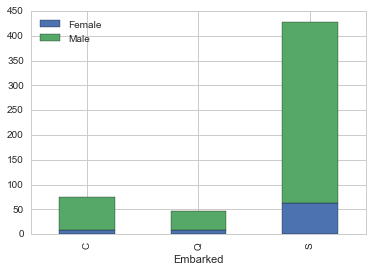

In [269]:
grouped_class[["Female","Male"]].count().plot.bar(stacked=True)

In [270]:
grouped_class = survivedMale[["Female","Male","Age"]].groupby(["Age"]);

In [271]:
withoutAge = titanic_df[pd.isnull(titanic_df["Age"]) == False]

In [272]:
withoutAge[withoutAge["Age"] <= 10].Fare.mean()

30.434439062500008

In [273]:
withoutAge[(withoutAge["Age"] > 10) & (withoutAge["Age"] <= 20)].Fare.mean()

29.529531304347838

In [274]:
withoutAge[(withoutAge["Age"] > 20) & (withoutAge["Age"] <= 30)].Fare.mean()

28.306718695652194

In [275]:
withoutAge[(withoutAge["Age"] > 30)].Fare.mean()

42.35290983606555

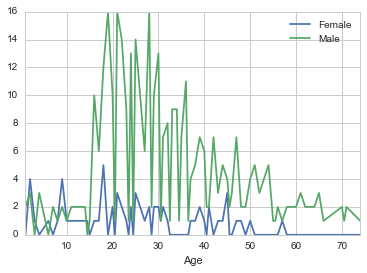

In [276]:
grouped_class[["Female","Male"]].count().plot()

In [277]:
filled_age = withoutAge[(withoutAge["Age"] <= 10) & (withoutAge["Pclass"] == 3)].sort_values("Age").describe()

In [278]:
withoutAge[(withoutAge["Age"] <= 10) & (withoutAge["Pclass"] == 3)].sort_values("Age").describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,44.000000,44.0,44.000000,44.000000,44.000000,44.000000
mean,0.431818,3.0,4.702727,2.318182,1.409091,24.415055
std,0.501056,0.0,3.129801,1.695037,0.542097,9.821237
min,0.000000,3.0,0.420000,0.000000,0.000000,8.516700
25%,0.000000,3.0,2.000000,1.000000,1.000000,15.900000
50%,0.000000,3.0,4.000000,3.000000,1.000000,23.087500
75%,1.000000,3.0,8.000000,4.000000,2.000000,31.275000
max,1.000000,3.0,10.000000,5.000000,2.000000,46.900000


In [279]:
withoutAge[(withoutAge["Age"] > 10) & (withoutAge["Age"] <= 20) & (withoutAge["Pclass"] == 3)].sort_values("Age").describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,79.000000,79.0,79.000000,79.000000,79.000000,79.000000
mean,0.253165,3.0,17.348101,0.658228,0.291139,12.217251
std,0.437603,0.0,2.311280,1.289863,0.643546,9.805771
min,0.000000,3.0,11.000000,0.000000,0.000000,0.000000
25%,0.000000,3.0,16.000000,0.000000,0.000000,7.775000
50%,0.000000,3.0,18.000000,0.000000,0.000000,8.050000
75%,0.500000,3.0,19.000000,1.000000,0.000000,11.241700
max,1.000000,3.0,20.000000,5.000000,3.000000,46.900000


In [280]:
withoutAge[(withoutAge["Age"] > 20) & (withoutAge["Age"] <= 30) & (withoutAge["Pclass"] == 3)].sort_values("Age").describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,129.000000,129.0,129.000000,129.000000,129.000000,129.000000
mean,0.232558,3.0,25.112403,0.209302,0.162791,10.492922
std,0.424110,0.0,2.978596,0.478840,0.596745,7.327594
min,0.000000,3.0,20.500000,0.000000,0.000000,0.000000
25%,0.000000,3.0,22.000000,0.000000,0.000000,7.750000
50%,0.000000,3.0,25.000000,0.000000,0.000000,7.895800
75%,0.000000,3.0,28.000000,0.000000,0.000000,9.500000
max,1.000000,3.0,30.000000,2.000000,4.000000,56.495800


In [281]:
withoutAge[withoutAge["Age"] > 30 & (withoutAge["Pclass"] == 3)].sort_values("Age").describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [282]:
withoutAge[(withoutAge["Age"] <= 10) & (withoutAge["Pclass"] == 1)].sort_values("Age").describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,3.000000,3.0,3.000000,3.000000,3.0,3.000000
mean,0.666667,1.0,2.306667,0.666667,2.0,128.319433
std,0.577350,0.0,1.562733,0.577350,0.0,40.236522
min,0.000000,1.0,0.920000,0.000000,2.0,81.858300
25%,0.500000,1.0,1.460000,0.500000,2.0,116.704150
50%,1.000000,1.0,2.000000,1.000000,2.0,151.550000
75%,1.000000,1.0,3.000000,1.000000,2.0,151.550000
max,1.000000,1.0,4.000000,1.000000,2.0,151.550000


In [54]:
no_age = titanic_df[pd.isnull(titanic_df["Age"]) == True]

In [283]:
withoutAge.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1048d4b00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ed3f128>]], dtype=object)

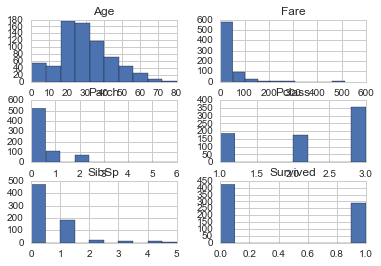

In [284]:
withoutAge.hist()

In [135]:
def setEmbarked(row):
    if row['Embarked'] == "S":
        return 1
    if row['Embarked'] == "Q":
        return 2
    if row['Embarked'] == "C":
        return 3
    
def setSex(row):
    if row['Sex'] == "male":
        return 0
    if row['Sex'] == "female":
        return 1
    
withoutAge['int_embarked'] = 1
withoutAge['int_embarked'] = withoutAge.apply(lambda row: setEmbarked(row), axis = 1)
no_age['int_embarked'] = no_age.apply(lambda row: setEmbarked(row), axis = 1)
withoutAge["int_sex"] = 0
withoutAge['int_sex'] = withoutAge.apply(lambda row: setSex(row), axis = 1)
no_age["int_sex"] = 0
no_age['int_sex'] = no_age.apply(lambda row: setSex(row), axis = 1)

/Users/abhisheknigam/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/abhisheknigam/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/abhisheknigam/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

In [224]:
#'int_embarked','int_sex','Fare','Parch','SibSp'
columns = ['Fare']
train_withoutAge = withoutAge.iloc[0:int((len(withoutAge) * 3)/4)]
test_withoutAge = withoutAge.iloc[int((len(withoutAge) * 3)/4) : ]
x_train, y_train, x_test, y_test = train_withoutAge[columns] ,train_withoutAge['Age'], test_withoutAge[columns], test_withoutAge['Age']

In [225]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import numpy as np
from sklearn.svm import SVR
import math
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [226]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

predicted_ = regression_model.predict(x_test)

error = np.mean((predicted_ - y_test) ** 2)

print(str(math.sqrt(error)))

14.170167480117563


In [227]:
    
svr_model = SVR(C=1.0, epsilon=0.2)
svr_model.fit(x_train, y_train)
predicted_svr = svr_model.predict(x_test)
error_svr = np.mean((predicted_svr - y_test) ** 2)
print(str(math.sqrt(error_svr)))


13.74289175869887


In [229]:
ridge_poly = make_pipeline(PolynomialFeatures(2), Ridge())
ridge_poly.fit(x_train, y_train)
predicted_ridge_poly = ridge_poly.predict(x_test)
error_poly = np.mean((predicted_ridge_poly - y_test) ** 2)
print(str(math.sqrt(error_poly)))

d = {'original': test_withoutAge['Age'], 'predicted': predicted_ridge_poly}
compare_df = pd.DataFrame(d)

14.093056165287363


In [165]:
withoutAge['int_embarked'] = withoutAge.apply(lambda row: setEmbarked(row), axis = 1)

/Users/abhisheknigam/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [166]:
compare_df.describe()

,original,predicted
count,179.000000,179.000000
mean,28.759330,30.429666
std,14.232339,8.625702
min,0.420000,4.223861
25%,19.000000,26.151799
50%,27.000000,29.124650
75%,38.000000,34.505575
max,74.000000,57.414523


In [167]:
predicted_age = ridge_poly.predict(no_age[columns])

In [168]:
no_age['Age'] = predicted_age

/Users/abhisheknigam/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [169]:
combined_df = withoutAge.append(no_age)

In [170]:
combined_df["Embarked"] = combined_df["Embarked"].fillna("S")

In [171]:
test_df    = pd.read_csv("test.csv", dtype={"Age": np.float64}, )

In [172]:
test_df['int_embarked'] = 1
test_df['int_embarked'] = test_df.apply(lambda row: setEmbarked(row), axis = 1)

In [173]:
test_df["int_sex"] = 0
test_df['int_sex'] = test_df.apply(lambda row: setSex(row), axis = 1)

In [174]:
combined_df["int_sex"] = 0
combined_df['int_sex'] = combined_df.apply(lambda row: setSex(row), axis = 1)

In [175]:
test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].mean())

In [176]:
no_age_test = test_df[pd.isnull(test_df["Age"]) == True]

In [177]:
with_age_test = test_df[pd.isnull(test_df["Age"]) == False]

In [178]:
test_predicted_ridge_poly = ridge_poly.predict(no_age_test[columns])
no_age_test["Age"] = test_predicted_ridge_poly

/Users/abhisheknigam/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [179]:
test_df = with_age_test.append(no_age_test)

In [215]:
columns = ['int_sex']
train_withoutSurvived = combined_df.iloc[0:int((len(withoutAge) * 3)/4)]
test_withoutSurvived = combined_df.iloc[int((len(withoutAge) * 3)/4) : ]
x_train, y_train, x_test, y_test = train_withoutSurvived[columns] ,train_withoutSurvived['Survived'], test_withoutSurvived[columns], test_withoutSurvived['Survived']

In [216]:
from sklearn.ensemble import RandomForestClassifier

In [217]:
random_forest = RandomForestClassifier(n_estimators=1000)

y_train_1 = np.asarray(train_withoutSurvived['Survived'], dtype="|S6")
y_test_1 = np.asarray(test_withoutSurvived['Survived'], dtype="|S6")

random_forest.fit(x_train, y_train_1)

y_pred = random_forest.predict(test_df[columns])

random_forest.score(x_test, y_test_1)

0.7640449438202247

In [218]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('titanic.csv', index=False)